# Files needed
* the pickle file containing the tifascores
* prompts file

# This notebook is intended to generate the visualization of the computed tifascores

# Imports

In [1]:
import pickle
import matplotlib.pyplot as plt
import os
import numpy as np

# Input paths

In [2]:
numberOfTifaVariants = 4

is1024 = False

if is1024:
    tifascoresdxl1024 = '' # path to the tifascore sdxl 1024 pkl file
    tifascoresdxlturbo1024 = '' # path to the tifascore sdxl turbo 1024 pkl file
    tifascorefluxschnell1024 = '' # path to the tifascore flux schnell1024 pkl file
    tifascoredalle1024 = '' # path to the tifascore dalle 1024 pkl file

    pklPathTifaScoreSDXL = [os.path.join(tifascoresdxl1024, i) for i in sorted(os.listdir(tifascoresdxl1024))]
    pklPathTifaScoreSDXLTurbo = [os.path.join(tifascoresdxlturbo1024, i) for i in sorted(os.listdir(tifascoresdxlturbo1024))]
    pklPathTifaScoreFluxSchnell = [os.path.join(tifascorefluxschnell1024, i) for i in sorted(os.listdir(tifascorefluxschnell1024))]
    pklPathTifaScoreDALLE = [os.path.join(tifascoredalle1024, i) for i in sorted(os.listdir(tifascoredalle1024))]

elif is1024 != True:
    tifascoresdxl512 = '' # path to the tifascore sdxl 512 pkl file
    tifascoresdxlturbo512 = '' # path to the tifascore sdxl turbo 512 pkl file
    tifascorefluxschnell512 = '' # path to the tifascore flux schnell 512 pkl file
    tifascoredalle512 = '' # path to the tifascore dalle 512 pkl file

    pklPathTifaScoreSDXL = [os.path.join(tifascoresdxl512, i) for i in sorted(os.listdir(tifascoresdxl512))]
    pklPathTifaScoreSDXLTurbo = [os.path.join(tifascoresdxlturbo512, i) for i in sorted(os.listdir(tifascoresdxlturbo512))]
    pklPathTifaScoreFluxSchnell = [os.path.join(tifascorefluxschnell512, i) for i in sorted(os.listdir(tifascorefluxschnell512))]
    pklPathTifaScoreDALLE = [os.path.join(tifascoredalle512, i) for i in sorted(os.listdir(tifascoredalle512))]



input_prompt_file = '' # path to the prompt file


print('pklPathTifaScoreSDXL: \n', pklPathTifaScoreSDXL)
print('pklPathTifaScoreSDXLTurbo: \n', pklPathTifaScoreSDXLTurbo)
print('pklPathTifaScoreFluxSchnell: \n', pklPathTifaScoreFluxSchnell)
print('pklPathTifaScoreDALLE: \n', pklPathTifaScoreDALLE)


# since the paths have been sorted, the order of list of dictionaries will be: 
# blip, git, mplug and vilt

pklPathTifaScoreSDXL: 
 ['/kaggle/input/tifascoresdxl512/tifaScore_SDXL_512_blip-large.pkl', '/kaggle/input/tifascoresdxl512/tifaScore_SDXL_512_git-large.pkl', '/kaggle/input/tifascoresdxl512/tifaScore_SDXL_512_mplug-large.pkl', '/kaggle/input/tifascoresdxl512/tifaScore_SDXL_512_vilt.pkl']
pklPathTifaScoreSDXLTurbo: 
 ['/kaggle/input/tifascoresdxlturbo512/tifaScore_SDXL_TURBO_512_blip-large.pkl', '/kaggle/input/tifascoresdxlturbo512/tifaScore_SDXL_TURBO_512_git-large.pkl', '/kaggle/input/tifascoresdxlturbo512/tifaScore_SDXL_TURBO_512_mplug-large.pkl', '/kaggle/input/tifascoresdxlturbo512/tifaScore_SDXL_TURBO_512_vilt.pkl']
pklPathTifaScoreFluxSchnell: 
 ['/kaggle/input/tifascorefluxschnell512/tifaScore_FLUX_SCHNELL_512_blip-large.pkl', '/kaggle/input/tifascorefluxschnell512/tifaScore_FLUX_SCHNELL_512_git-large.pkl', '/kaggle/input/tifascorefluxschnell512/tifaScore_FLUX_SCHNELL_512_mplug-large.pkl', '/kaggle/input/tifascorefluxschnell512/tifaScore_FLUX_SCHNELL_512_vilt.pkl']
pklPathTifa

# utils

In [3]:
#convert pickle to dictionary 
def convertPickleToDictionary(filePath):
    dictOfDictionaries = {}
    rootDirectory = '' # the path where the tifa scores are stored
    for i in filePath:
        fp = os.path.join(rootDirectory, i)
        with open(fp, 'rb') as f:
            dictOfDictionaries[i.split('/')[-1]] = pickle.load(f)
    return dictOfDictionaries

#extract keys and values from the input dictionary
def extractDictionaryKeyAndValues(inputDictionary):
    dictKeys = list(inputDictionary.keys())
    dictValues = list(inputDictionary.values())
    return dictKeys, dictValues

# Read the pickle file

In [4]:
dictOfDictTifaScoreSDXL = convertPickleToDictionary(pklPathTifaScoreSDXL)
dictOfDictTifaScoreSDXLTurbo = convertPickleToDictionary(pklPathTifaScoreSDXLTurbo)
dictOfDictTifaScoreDALLE = convertPickleToDictionary(pklPathTifaScoreDALLE)
dictOfDictTifaScoreFluxSchnell = convertPickleToDictionary(pklPathTifaScoreFluxSchnell)

listOfDictOfDictTifaScores = [dictOfDictTifaScoreDALLE,
                              dictOfDictTifaScoreSDXL,
                              dictOfDictTifaScoreFluxSchnell,
                              dictOfDictTifaScoreSDXLTurbo]

# each variable declared above is a list of 4 dictionaries (dictOfDictTifaScores.....) , 
# for instance dictTifaScoresSDXL contains 4 dictionaries (corresponding to blip, git, mplug and vilt)
# containing 198 tifa scores for sdxl t2i model

In [5]:
for d in listOfDictOfDictTifaScores:
    for k, v in d.items():
        print(k)
        tifa = []
        for i in v:
            tifa.append(i['tifa_score'])
        print(tifa)
        print(len(tifa))
        #print('xxx')
    print('------')

tifaScore_DALL-E_512_blip-large.pkl
[0.8333333333333334, 1, 0.6666666666666666, 0.8, 1, 0.6666666666666666, 0.6363636363636364, 0.6666666666666666, 0.6, 1, 0.6666666666666666, 0.8571428571428571, 0.8888888888888888, 0.875, 1, 0.5714285714285714, 0.8, 0.7142857142857143, 0.5555555555555556, 0.6666666666666666, 1, 0.625, 0.75, 0.7777777777777778, 0.42857142857142855, 0.7272727272727273, 0.8, 0.25, 1, 1, 1, 0.75, 1, 1, 0.7777777777777778, 0.7142857142857143, 0.8, 0.6666666666666666, 0.7777777777777778, 0.6666666666666666, 0.8571428571428571, 0.75, 0.6666666666666666, 1, 0.7142857142857143, 0.8, 0.6666666666666666, 0.7777777777777778, 0.75, 0.8333333333333334, 0.3333333333333333, 0.75, 0.8, 0.75, 0.5714285714285714, 0.75, 0.7777777777777778, 1, 0.7272727272727273, 0.75, 0.8888888888888888, 0.875, 0.8181818181818182, 1, 0.9090909090909091, 0.875, 1, 0.6666666666666666, 0.5, 0.6, 0.625, 0.6666666666666666, 0.8, 0.875, 0.6666666666666666, 0.8, 0.7142857142857143, 0.9090909090909091, 0.8571428

In [6]:
for dictOfDict in listOfDictOfDictTifaScores:
    for i, j in dictOfDict.items():
        print(i)
        #print(j[197])
        print('xxxxxxx')

tifaScore_DALL-E_512_blip-large.pkl
xxxxxxx
tifaScore_DALL-E_512_git-large.pkl
xxxxxxx
tifaScore_DALL-E_512_mplug-large.pkl
xxxxxxx
tifaScore_DALL-E_512_vilt.pkl
xxxxxxx
tifaScore_SDXL_512_blip-large.pkl
xxxxxxx
tifaScore_SDXL_512_git-large.pkl
xxxxxxx
tifaScore_SDXL_512_mplug-large.pkl
xxxxxxx
tifaScore_SDXL_512_vilt.pkl
xxxxxxx
tifaScore_FLUX_SCHNELL_512_blip-large.pkl
xxxxxxx
tifaScore_FLUX_SCHNELL_512_git-large.pkl
xxxxxxx
tifaScore_FLUX_SCHNELL_512_mplug-large.pkl
xxxxxxx
tifaScore_FLUX_SCHNELL_512_vilt.pkl
xxxxxxx
tifaScore_SDXL_TURBO_512_blip-large.pkl
xxxxxxx
tifaScore_SDXL_TURBO_512_git-large.pkl
xxxxxxx
tifaScore_SDXL_TURBO_512_mplug-large.pkl
xxxxxxx
tifaScore_SDXL_TURBO_512_vilt.pkl
xxxxxxx


# Read the prompt file

In [7]:
with open(input_prompt_file) as file:
    # add only those entries in the list from the prompt file that do not have '#' identifier
    prompt_list = [line.rstrip() for line in file if '#' not in line]
prompt_dictionary = {int(val.split(' : ')[0]):val.split(' : ')[-1] for val in prompt_list}
prompts = [val.split(' : ')[-1] for val in prompt_list]
prompt_length = [len(val.split(' ')) for val in prompts]
print(prompt_length)


[7, 5, 4, 5, 4, 8, 11, 9, 8, 10, 10, 10, 5, 8, 4, 6, 9, 10, 12, 9, 16, 11, 4, 11, 13, 10, 7, 8, 4, 10, 11, 10, 10, 10, 10, 8, 8, 9, 7, 7, 3, 10, 7, 3, 7, 10, 4, 3, 10, 14, 9, 12, 10, 13, 12, 9, 11, 11, 8, 12, 12, 9, 11, 14, 18, 15, 9, 12, 12, 13, 14, 9, 10, 10, 9, 8, 20, 11, 13, 10, 12, 15, 13, 3, 13, 8, 10, 10, 9, 8, 7, 8, 8, 9, 5, 9, 5, 11, 11, 13, 6, 11, 12, 10, 12, 8, 8, 7, 6, 11, 9, 6, 10, 9, 6, 11, 12, 9, 8, 10, 8, 10, 16, 9, 11, 9, 11, 11, 9, 13, 11, 9, 6, 5, 16, 10, 10, 10, 12, 6, 10, 6, 6, 5, 7, 8, 9, 10, 7, 10, 8, 9, 9, 8, 10, 7, 9, 9, 3, 12, 10, 7, 6, 10, 7, 9, 12, 9, 10, 12, 12, 8, 7, 7, 7, 8, 9, 5, 10, 6, 9, 9, 13, 8, 5, 8, 11, 5, 9, 8, 7, 8, 12, 10, 6, 11, 8, 7, 7, 7]


In [8]:
print(prompt_dictionary)

{1: 'conductor conducting an orchestra, shot from behind', 2: 'a soldier saluting, news photograph', 3: 'road bicycle, studio lighting', 4: 'an A4 clipboard, stock photograph', 5: 'several examples of origami', 6: 'closeup of an armrest on a comfy armchair', 7: 'a straight, metal pipe with bolted joins runs through the desert', 8: 'closeup of a fine leather wallet on a benchtop', 9: "an astronaut spacesuit in a museum, tourist's photograph", 10: 'a jacket laid out on a white background, studio lighting', 11: 'closeup of a hat brim, centred on the brim edge', 12: 'solitary tuft of grass grows in a rocky landscape, closeup', 13: 'wooden diamond-shaped lattice, outdoor light', 14: 'Musician playing a saxophone, high detail, studio lighting', 15: 'Closeup of potato chips', 16: 'A beautifully gift-wrapped present, studio light', 17: 'Surgeons in blue scrubs perform a surgery, stock photograph', 18: 'A woman greets guests at the front door, stock photograph', 19: 'A restaurant employee takes

In [9]:
print(len(prompt_dictionary))

200


# Color scheme

In [10]:
# Default color cycle (Tableau 10 colors)
colors = [
    '#1f77b4',  # blue
    '#ff7f0e',  # orange
    '#2ca02c',  # green
    '#d62728',  # red
    '#9467bd',  # purple
    '#8c564b',  # brown
    '#e377c2',  # pink
    '#7f7f7f',  # gray
    '#bcbd22',  # yellow-green
    '#17becf'   # teal
]

# Extract the keys and the values from the tifaScoreDictionary

In [11]:
dictKeysTifaScoreDALLE, dictValuesTifaScoreDALLE = extractDictionaryKeyAndValues(listOfDictOfDictTifaScores[0])
dictKeysTifaScoreSDXL, dictValuesTifaScoreSDXL = extractDictionaryKeyAndValues(listOfDictOfDictTifaScores[1])
dictKeysTifaScoreFluxSchnell, dictValuesTifaScoreFluxSchnell = extractDictionaryKeyAndValues(listOfDictOfDictTifaScores[2])
dictKeysTifaScoreSDXLTurbo, dictValuesTifaScoreSDXLTurbo = extractDictionaryKeyAndValues(listOfDictOfDictTifaScores[3])

In [12]:
print(len(dictKeysTifaScoreSDXLTurbo))
print(dictKeysTifaScoreSDXLTurbo)
print(len(dictValuesTifaScoreSDXLTurbo))
#print(dictValuesTifaScoreSDXLTurbo)
#print(dictValuesTifaScoreSDXLTurbo[0][0]['tifa_score'])
#print(dictValuesTifaScoreSDXLTurbo[0][1])

4
['tifaScore_SDXL_TURBO_512_blip-large.pkl', 'tifaScore_SDXL_TURBO_512_git-large.pkl', 'tifaScore_SDXL_TURBO_512_mplug-large.pkl', 'tifaScore_SDXL_TURBO_512_vilt.pkl']
4


In [13]:
for k, v in listOfDictOfDictTifaScores[0].items():
    print('dalle')
    print(k)
    #print(v)
    print('-----')

dalle
tifaScore_DALL-E_512_blip-large.pkl
-----
dalle
tifaScore_DALL-E_512_git-large.pkl
-----
dalle
tifaScore_DALL-E_512_mplug-large.pkl
-----
dalle
tifaScore_DALL-E_512_vilt.pkl
-----


In [14]:
for k, v in listOfDictOfDictTifaScores[1].items():
    print('dalle')
    print(k)
    #print(v)
    print('-----')

dalle
tifaScore_SDXL_512_blip-large.pkl
-----
dalle
tifaScore_SDXL_512_git-large.pkl
-----
dalle
tifaScore_SDXL_512_mplug-large.pkl
-----
dalle
tifaScore_SDXL_512_vilt.pkl
-----


In [15]:
for k, v in listOfDictOfDictTifaScores[2].items():
    print('dalle')
    print(k)
    #print(v)
    print('-----')

dalle
tifaScore_FLUX_SCHNELL_512_blip-large.pkl
-----
dalle
tifaScore_FLUX_SCHNELL_512_git-large.pkl
-----
dalle
tifaScore_FLUX_SCHNELL_512_mplug-large.pkl
-----
dalle
tifaScore_FLUX_SCHNELL_512_vilt.pkl
-----


In [16]:
for k, v in listOfDictOfDictTifaScores[3].items():
    print('dalle')
    print(k)
    #print(v)
    print('-----')

dalle
tifaScore_SDXL_TURBO_512_blip-large.pkl
-----
dalle
tifaScore_SDXL_TURBO_512_git-large.pkl
-----
dalle
tifaScore_SDXL_TURBO_512_mplug-large.pkl
-----
dalle
tifaScore_SDXL_TURBO_512_vilt.pkl
-----


# Line graph (same tifa metric across T2I models)

In [17]:
def linePlot(t2IModelList, tifaMetricList, dictOfDictTifaScore, metricIndex):
    for modelIndex in range(len(t2IModelList)):
        tifaScores = [i['tifa_score'] for i in list(dictOfDictTifaScore[modelIndex].values())[metricIndex]]
        #captionsWithNonZeroTifaScores = [i['caption'] for i in list(dictOfDictTifaScore[modelIndex].values())[metricIndex]]
        data = list(dictOfDictTifaScore[modelIndex].values())[metricIndex]
        tempCaptions = [details['caption'] for entry in data for details in entry['question_details'].values()]
        captions = list(set(tempCaptions))
        #print(captions)

        missingCaptionsIndices = [key for key, value in prompt_dictionary.items() if value not in captions]
        missingCaptions = [value for key, value in prompt_dictionary.items() if value not in captions]
        print('missing captions: ', missingCaptions)
        print('missing caption indices: ', missingCaptionsIndices)
        # update those indices with np.nan where the llama wasn't able to generate the questions
        [tifaScores.insert(i, np.nan) for i in missingCaptionsIndices]
        print(t2IModelList[modelIndex])
        print(tifaMetricList[metricIndex])
        print(tifaScores)
        
        plt.plot(range(len(tifaScores)),
                 tifaScores,
                 label=t2IModelList[modelIndex],
                 alpha=0.5
                 )
        #plt.scatter(color="red", marker="x", label="NaN marker")

        plt.grid(alpha=0.5)
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=4)
        #plt.title('CLIPScore vs prompt #')
        plt.ylabel('TIFA-'+tifaMetricList[metricIndex])
        plt.xlabel('prompt #')
        #plt.yticks(np.arange(0, 1.2, 0.2))
        #break
    #print(list(listOfDictionaries[modelIndex].keys())[metricIndex].split('/')[-1]+'_line_plot.png')
    fileName = tifaMetricList[metricIndex]
    if is1024:
        plt.savefig(fileName+'_line_plot_1024.png', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
        plt.savefig(fileName+'_line_plot_1024.pdf', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
    elif is1024 != True:
        plt.savefig(fileName+'_line_plot_512.png', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
        plt.savefig(fileName+'_line_plot_512.pdf', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
    plt.show()

missing captions:  ['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
missing caption indices:  [30, 139]
DALL-E 2
blip
[0.8333333333333334, 1, 0.6666666666666666, 0.8, 1, 0.6666666666666666, 0.6363636363636364, 0.6666666666666666, 0.6, 1, 0.6666666666666666, 0.8571428571428571, 0.8888888888888888, 0.875, 1, 0.5714285714285714, 0.8, 0.7142857142857143, 0.5555555555555556, 0.6666666666666666, 1, 0.625, 0.75, 0.7777777777777778, 0.42857142857142855, 0.7272727272727273, 0.8, 0.25, 1, 1, nan, 1, 0.75, 1, 1, 0.7777777777777778, 0.7142857142857143, 0.8, 0.6666666666666666, 0.7777777777777778, 0.6666666666666666, 0.8571428571428571, 0.75, 0.6666666666666666, 1, 0.7142857142857143, 0.8, 0.6666666666666666, 0.7777777777777778, 0.75, 0.8333333333333334, 0.3333333333333333, 0.75, 0.8, 0.75, 0.5714285714285714, 0.75, 0.7777777777777778, 1, 0.7272727272727273, 0.75, 0.8888888888888888, 0.875, 0.81818

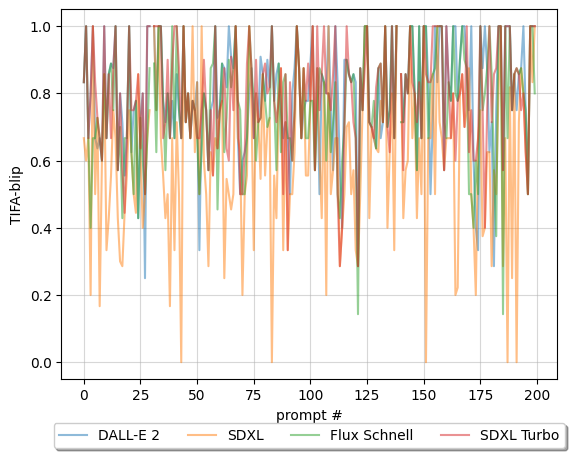

missing captions:  ['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
missing caption indices:  [30, 139]
DALL-E 2
git
[1, 0.6, 0.3333333333333333, 0.4, 1, 0.6666666666666666, 0.5454545454545454, 0.5, 0.6, 0.42857142857142855, 0.6666666666666666, 0.5714285714285714, 0.6666666666666666, 0.875, 1, 0.42857142857142855, 0.7, 0.5714285714285714, 0.7777777777777778, 0.5555555555555556, 0.75, 0.625, 0.75, 0.5555555555555556, 0.42857142857142855, 0.9090909090909091, 0.6, 0.25, 0.6666666666666666, 1, nan, 0.7777777777777778, 0.75, 0.5, 0.8333333333333334, 0.6666666666666666, 0.7142857142857143, 0.7, 0.5, 0.8888888888888888, 1, 0.8571428571428571, 1, 0.6666666666666666, 1, 0.5714285714285714, 0.6, 0.6666666666666666, 0.8888888888888888, 0.75, 0.5, 0.5, 0.75, 0.9, 0.625, 0.5714285714285714, 0.875, 0.7777777777777778, 0.8333333333333334, 0.5454545454545454, 1, 1, 0.375, 0.8181818181818182, 0.4, 1, 0

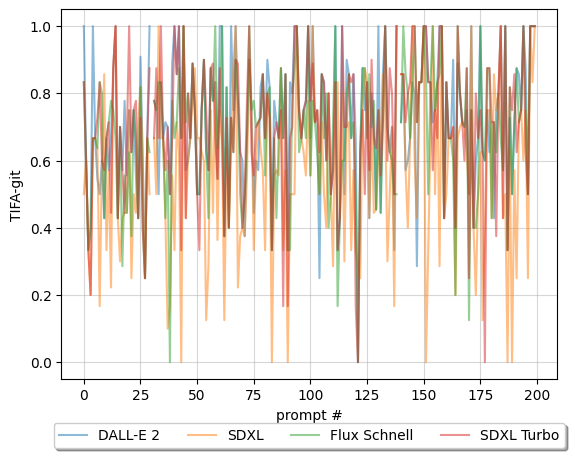

missing captions:  ['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
missing caption indices:  [30, 139]
DALL-E 2
mplug
[0.8333333333333334, 0.8, 0.6666666666666666, 0.6, 1, 0.6666666666666666, 0.6363636363636364, 0.6666666666666666, 0.6, 0.7142857142857143, 0.6666666666666666, 1, 0.8888888888888888, 0.75, 1, 0.5714285714285714, 0.7, 0.7142857142857143, 0.6666666666666666, 0.6666666666666666, 0.75, 0.75, 0.75, 0.8888888888888888, 0.7142857142857143, 0.7272727272727273, 0.6, 0.5, 1, 0.875, nan, 0.7777777777777778, 0.75, 0.6666666666666666, 1, 0.7777777777777778, 0.5714285714285714, 0.7, 0.8333333333333334, 1, 1, 1, 0.5, 0, 1, 0.8571428571428571, 0.8, 0.6666666666666666, 0.7777777777777778, 0.875, 0.8333333333333334, 0.6666666666666666, 0.75, 0.9, 0.875, 0.42857142857142855, 1, 0.8888888888888888, 0.8333333333333334, 0.6363636363636364, 0.875, 1, 0.75, 0.7272727272727273, 0.8, 0.727272727

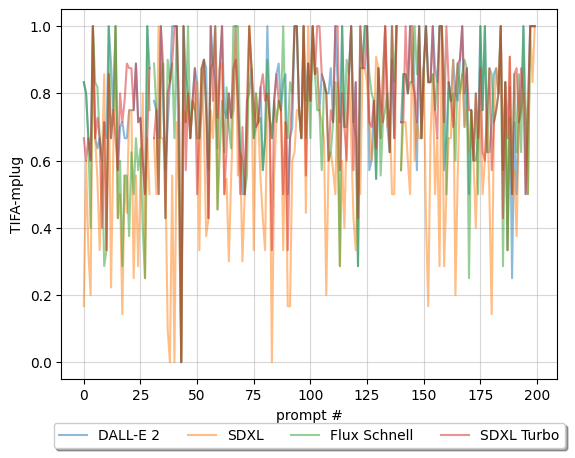

missing captions:  ['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
missing caption indices:  [30, 139]
DALL-E 2
vilt
[0.6666666666666666, 0.4, 0, 0.2, 0.6666666666666666, 0.5, 0.6363636363636364, 0.5, 0.6, 0.7142857142857143, 0.6666666666666666, 0.7142857142857143, 0.4444444444444444, 0.5, 0.3333333333333333, 0.42857142857142855, 0.7, 0.5714285714285714, 0.5555555555555556, 0.6666666666666666, 0.625, 0.5, 0.5, 0.3333333333333333, 0.42857142857142855, 0.18181818181818182, 0.4, 0.5, 0.6666666666666666, 0.875, nan, 1, 0.625, 0.8333333333333334, 0.6666666666666666, 0.7777777777777778, 0.5714285714285714, 0.8, 0.5, 0.7777777777777778, 0.3333333333333333, 0.8571428571428571, 0.875, 0.3333333333333333, 1, 0.8571428571428571, 0.6, 1, 0.7777777777777778, 0.5, 0.6666666666666666, 0.5, 0.75, 0.8, 0.375, 0.42857142857142855, 0.75, 0.6666666666666666, 0.8333333333333334, 0.36363636363636365, 0.625

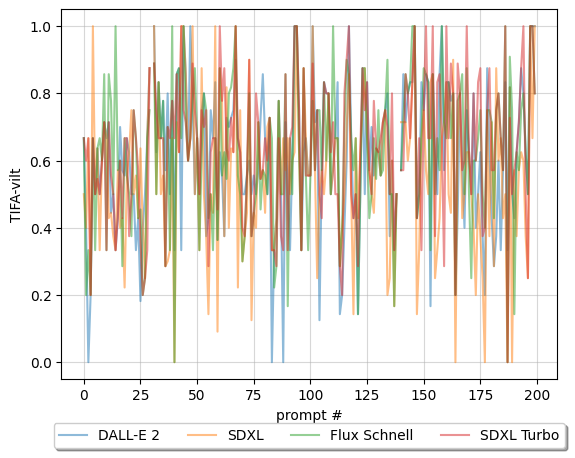

In [18]:
t2IModelList = ['DALL-E 2', 'SDXL', 'Flux Schnell', 'SDXL Turbo']
tifaMetricList = ['blip', 'git', 'mplug', 'vilt']

for metricIndex in range(len(tifaMetricList)):
    linePlot(t2IModelList,
             tifaMetricList,
             [dictOfDictTifaScoreDALLE, dictOfDictTifaScoreSDXL, dictOfDictTifaScoreFluxSchnell, dictOfDictTifaScoreSDXLTurbo],
             metricIndex)

# Scatter plot (same tifa metric across T2I models)

In [19]:
def scatterPlot(t2IModelList, tifaMetricList, dictOfDictTifaScore, metricIndex):
    for modelIndex in range(len(t2IModelList)):
        tifaScores = [i['tifa_score'] for i in list(dictOfDictTifaScore[modelIndex].values())[metricIndex]]
        #captionsWithNonZeroTifaScores = [i['caption'] for i in list(dictOfDictTifaScore[modelIndex].values())[metricIndex]]
        data = list(dictOfDictTifaScore[modelIndex].values())[metricIndex]
        tempCaptions = [details['caption'] for entry in data for details in entry['question_details'].values()]
        captions = list(set(tempCaptions))
        #print(captions)

        missingCaptionsIndices = [key for key, value in prompt_dictionary.items() if value not in captions]
        missingCaptions = [value for key, value in prompt_dictionary.items() if value not in captions]
        print('missing captions: ', missingCaptions)
        print('missing caption indices: ', missingCaptionsIndices)
        # update those indices with np.nan where the llama wasn't able to generate the questions
        [tifaScores.insert(i, np.nan) for i in missingCaptionsIndices]
        print(t2IModelList[modelIndex])
        print(tifaMetricList[metricIndex])
        print(tifaScores)
        
        plt.scatter(range(len(tifaScores)),
                    tifaScores,
                    s=5,
                    label=t2IModelList[modelIndex],
                    alpha=0.5
                 )
        #plt.scatter(color="red", marker="x", label="NaN marker")

        plt.grid(alpha=0.5)
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=4)
        #plt.title('CLIPScore vs prompt #')
        plt.ylabel('TIFA-'+tifaMetricList[metricIndex])
        plt.xlabel('prompt #')
    #print(list(listOfDictionaries[modelIndex].keys())[metricIndex].split('/')[-1]+'_line_plot.png')
    fileName = tifaMetricList[metricIndex]
    if is1024:
        plt.savefig(fileName+'_scatter_plot_1024.png', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
        plt.savefig(fileName+'_scatter_plot_1024.pdf', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
    if is1024 != True:
        plt.savefig(fileName+'_scatter_plot_512.png', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
        plt.savefig(fileName+'_scatter_plot_512.pdf', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
    plt.show()

missing captions:  ['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
missing caption indices:  [30, 139]
DALL-E 2
blip
[0.8333333333333334, 1, 0.6666666666666666, 0.8, 1, 0.6666666666666666, 0.6363636363636364, 0.6666666666666666, 0.6, 1, 0.6666666666666666, 0.8571428571428571, 0.8888888888888888, 0.875, 1, 0.5714285714285714, 0.8, 0.7142857142857143, 0.5555555555555556, 0.6666666666666666, 1, 0.625, 0.75, 0.7777777777777778, 0.42857142857142855, 0.7272727272727273, 0.8, 0.25, 1, 1, nan, 1, 0.75, 1, 1, 0.7777777777777778, 0.7142857142857143, 0.8, 0.6666666666666666, 0.7777777777777778, 0.6666666666666666, 0.8571428571428571, 0.75, 0.6666666666666666, 1, 0.7142857142857143, 0.8, 0.6666666666666666, 0.7777777777777778, 0.75, 0.8333333333333334, 0.3333333333333333, 0.75, 0.8, 0.75, 0.5714285714285714, 0.75, 0.7777777777777778, 1, 0.7272727272727273, 0.75, 0.8888888888888888, 0.875, 0.81818

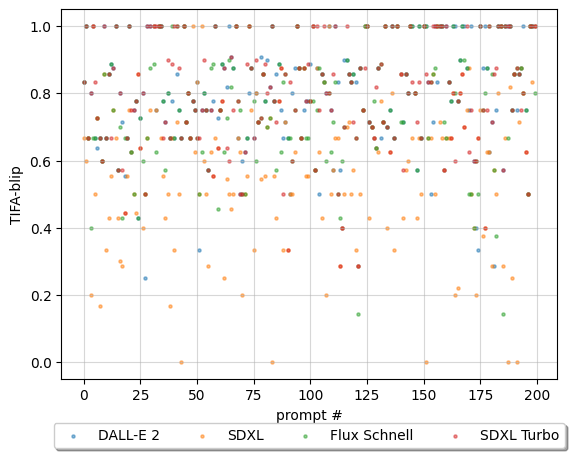

missing captions:  ['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
missing caption indices:  [30, 139]
DALL-E 2
git
[1, 0.6, 0.3333333333333333, 0.4, 1, 0.6666666666666666, 0.5454545454545454, 0.5, 0.6, 0.42857142857142855, 0.6666666666666666, 0.5714285714285714, 0.6666666666666666, 0.875, 1, 0.42857142857142855, 0.7, 0.5714285714285714, 0.7777777777777778, 0.5555555555555556, 0.75, 0.625, 0.75, 0.5555555555555556, 0.42857142857142855, 0.9090909090909091, 0.6, 0.25, 0.6666666666666666, 1, nan, 0.7777777777777778, 0.75, 0.5, 0.8333333333333334, 0.6666666666666666, 0.7142857142857143, 0.7, 0.5, 0.8888888888888888, 1, 0.8571428571428571, 1, 0.6666666666666666, 1, 0.5714285714285714, 0.6, 0.6666666666666666, 0.8888888888888888, 0.75, 0.5, 0.5, 0.75, 0.9, 0.625, 0.5714285714285714, 0.875, 0.7777777777777778, 0.8333333333333334, 0.5454545454545454, 1, 1, 0.375, 0.8181818181818182, 0.4, 1, 0

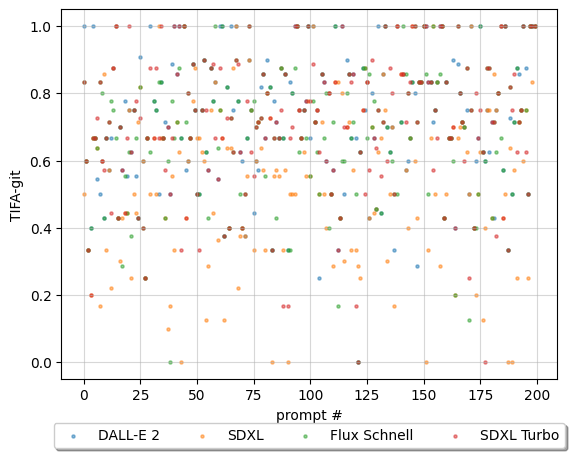

missing captions:  ['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
missing caption indices:  [30, 139]
DALL-E 2
mplug
[0.8333333333333334, 0.8, 0.6666666666666666, 0.6, 1, 0.6666666666666666, 0.6363636363636364, 0.6666666666666666, 0.6, 0.7142857142857143, 0.6666666666666666, 1, 0.8888888888888888, 0.75, 1, 0.5714285714285714, 0.7, 0.7142857142857143, 0.6666666666666666, 0.6666666666666666, 0.75, 0.75, 0.75, 0.8888888888888888, 0.7142857142857143, 0.7272727272727273, 0.6, 0.5, 1, 0.875, nan, 0.7777777777777778, 0.75, 0.6666666666666666, 1, 0.7777777777777778, 0.5714285714285714, 0.7, 0.8333333333333334, 1, 1, 1, 0.5, 0, 1, 0.8571428571428571, 0.8, 0.6666666666666666, 0.7777777777777778, 0.875, 0.8333333333333334, 0.6666666666666666, 0.75, 0.9, 0.875, 0.42857142857142855, 1, 0.8888888888888888, 0.8333333333333334, 0.6363636363636364, 0.875, 1, 0.75, 0.7272727272727273, 0.8, 0.727272727

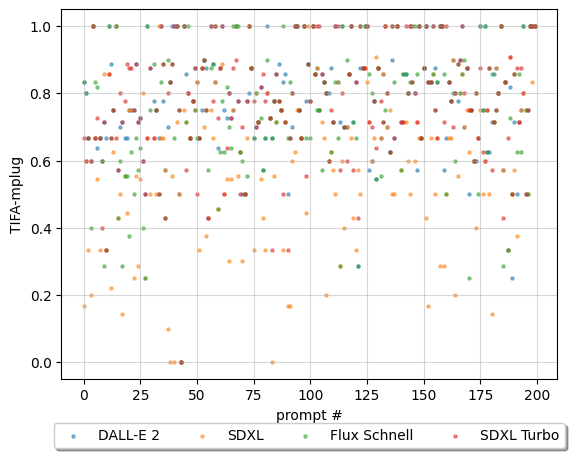

missing captions:  ['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
missing caption indices:  [30, 139]
DALL-E 2
vilt
[0.6666666666666666, 0.4, 0, 0.2, 0.6666666666666666, 0.5, 0.6363636363636364, 0.5, 0.6, 0.7142857142857143, 0.6666666666666666, 0.7142857142857143, 0.4444444444444444, 0.5, 0.3333333333333333, 0.42857142857142855, 0.7, 0.5714285714285714, 0.5555555555555556, 0.6666666666666666, 0.625, 0.5, 0.5, 0.3333333333333333, 0.42857142857142855, 0.18181818181818182, 0.4, 0.5, 0.6666666666666666, 0.875, nan, 1, 0.625, 0.8333333333333334, 0.6666666666666666, 0.7777777777777778, 0.5714285714285714, 0.8, 0.5, 0.7777777777777778, 0.3333333333333333, 0.8571428571428571, 0.875, 0.3333333333333333, 1, 0.8571428571428571, 0.6, 1, 0.7777777777777778, 0.5, 0.6666666666666666, 0.5, 0.75, 0.8, 0.375, 0.42857142857142855, 0.75, 0.6666666666666666, 0.8333333333333334, 0.36363636363636365, 0.625

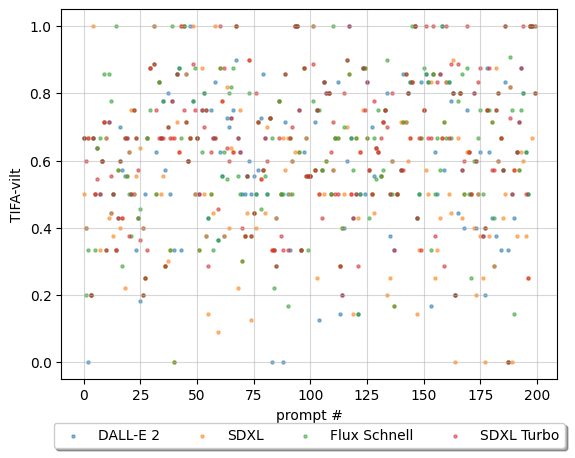

In [20]:
t2IModelList = ['DALL-E 2', 'SDXL', 'Flux Schnell', 'SDXL Turbo']
tifaMetricList = ['blip', 'git', 'mplug', 'vilt']

for metricIndex in range(len(tifaMetricList)):
    scatterPlot(t2IModelList,
             tifaMetricList,
             [dictOfDictTifaScoreDALLE, dictOfDictTifaScoreSDXL, dictOfDictTifaScoreFluxSchnell, dictOfDictTifaScoreSDXLTurbo],
             metricIndex)

# Histogram

In [21]:
def histogramPlot(t2IModelList, tifaMetricList, dictOfDictTifaScore, metricIndex):
    # Define the custom bin width
    bin_width = 0.05

    for modelIndex in range(len(t2IModelList)):
        tifaScores = [i['tifa_score'] for i in list(dictOfDictTifaScore[modelIndex].values())[metricIndex]]
        #captionsWithNonZeroTifaScores = [i['caption'] for i in list(dictOfDictTifaScore[modelIndex].values())[metricIndex]]
        data = list(dictOfDictTifaScore[modelIndex].values())[metricIndex]
        tempCaptions = [details['caption'] for entry in data for details in entry['question_details'].values()]
        captions = list(set(tempCaptions))
        #print(captions)

        missingCaptionsIndices = [key for key, value in prompt_dictionary.items() if value not in captions]
        missingCaptions = [value for key, value in prompt_dictionary.items() if value not in captions]
        print('missing captions: ', missingCaptions)
        print('missing caption indices: ', missingCaptionsIndices)
        # update those indices with np.nan where the llama wasn't able to generate the questions
        [tifaScores.insert(i, np.nan) for i in missingCaptionsIndices]
        print(t2IModelList[modelIndex])
        print(tifaMetricList[metricIndex])
        print(tifaScores)

        unique, count = np.unique(tifaScores, return_counts=True)
        print('unique: ', unique)
        print('count: ', count)

        # Generate bin edges based on the minimum and maximum of all data
        min_edge = 0
        max_edge = 1
        bin_edges = np.arange(min_edge, max_edge + bin_width, bin_width)

        counts, bins, patches = plt.hist(tifaScores, 
                                         bins=bin_edges, 
                                         edgecolor='black',
                                         color=colors[modelIndex],
                                         alpha=0.5,
                                         label=t2IModelList[modelIndex])
        print('bins: ', bins)
        #Y AXIS SHOULD BE THE COUNT OF THE OCCURENCES AND THE X AXIS SHOULD BE THE TIFA SCORE INTERVALS
        # Connect the tops of the bins
        bin_centers = (bins[:-1] + bins[1:]) / 2  # Calculate the center of each bin
        plt.plot(bin_centers,
                 counts,
                 alpha=0.75,
                 color=colors[modelIndex],
                 linestyle='--',
                 marker='x',
                 label=t2IModelList[modelIndex])
        plt.axvline(np.nanmean(tifaScores),
                    color=colors[modelIndex], linestyle='--', label=t2IModelList[modelIndex]+' $\mu$')
        
    #print(list(listOfDictionaries[modelIndex].keys())[metricIndex].split('/')[-1]+'_line_plot.png')
    fileName = tifaMetricList[metricIndex]
    plt.grid(alpha=0.5)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=4)
    #plt.title('Distribution of '+ list(dictOfDictionaries.keys())[metricIndex].split('/')[-1])
    plt.title('Distribution of tifa-'+tifaMetricList[metricIndex])
    plt.ylabel('Count')
    plt.xlabel('TIFA Score')
    plt.yticks(np.arange(0, 55, 10))
    if is1024:
        plt.savefig(fileName+'_histogram_plot_1024.png', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
        plt.savefig(fileName+'_histogram_plot_1024.pdf', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
    elif is1024 != True:
        plt.savefig(fileName+'_histogram_plot_512.png', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
        plt.savefig(fileName+'_histogram_plot_512.pdf', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.1)
    plt.show()
    

missing captions:  ['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
missing caption indices:  [30, 139]
DALL-E 2
blip
[0.8333333333333334, 1, 0.6666666666666666, 0.8, 1, 0.6666666666666666, 0.6363636363636364, 0.6666666666666666, 0.6, 1, 0.6666666666666666, 0.8571428571428571, 0.8888888888888888, 0.875, 1, 0.5714285714285714, 0.8, 0.7142857142857143, 0.5555555555555556, 0.6666666666666666, 1, 0.625, 0.75, 0.7777777777777778, 0.42857142857142855, 0.7272727272727273, 0.8, 0.25, 1, 1, nan, 1, 0.75, 1, 1, 0.7777777777777778, 0.7142857142857143, 0.8, 0.6666666666666666, 0.7777777777777778, 0.6666666666666666, 0.8571428571428571, 0.75, 0.6666666666666666, 1, 0.7142857142857143, 0.8, 0.6666666666666666, 0.7777777777777778, 0.75, 0.8333333333333334, 0.3333333333333333, 0.75, 0.8, 0.75, 0.5714285714285714, 0.75, 0.7777777777777778, 1, 0.7272727272727273, 0.75, 0.8888888888888888, 0.875, 0.81818

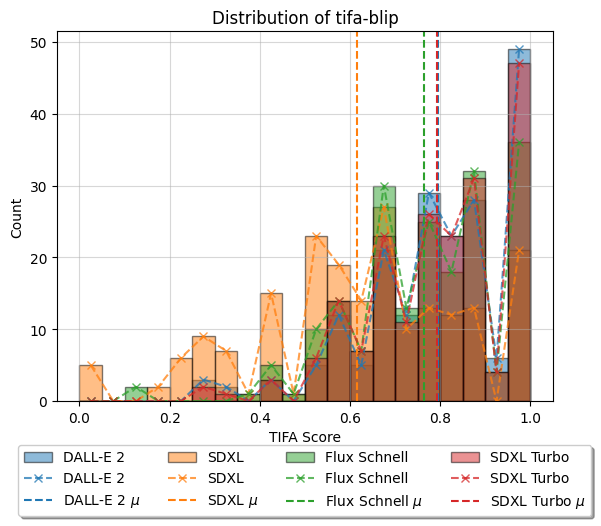

missing captions:  ['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
missing caption indices:  [30, 139]
DALL-E 2
git
[1, 0.6, 0.3333333333333333, 0.4, 1, 0.6666666666666666, 0.5454545454545454, 0.5, 0.6, 0.42857142857142855, 0.6666666666666666, 0.5714285714285714, 0.6666666666666666, 0.875, 1, 0.42857142857142855, 0.7, 0.5714285714285714, 0.7777777777777778, 0.5555555555555556, 0.75, 0.625, 0.75, 0.5555555555555556, 0.42857142857142855, 0.9090909090909091, 0.6, 0.25, 0.6666666666666666, 1, nan, 0.7777777777777778, 0.75, 0.5, 0.8333333333333334, 0.6666666666666666, 0.7142857142857143, 0.7, 0.5, 0.8888888888888888, 1, 0.8571428571428571, 1, 0.6666666666666666, 1, 0.5714285714285714, 0.6, 0.6666666666666666, 0.8888888888888888, 0.75, 0.5, 0.5, 0.75, 0.9, 0.625, 0.5714285714285714, 0.875, 0.7777777777777778, 0.8333333333333334, 0.5454545454545454, 1, 1, 0.375, 0.8181818181818182, 0.4, 1, 0

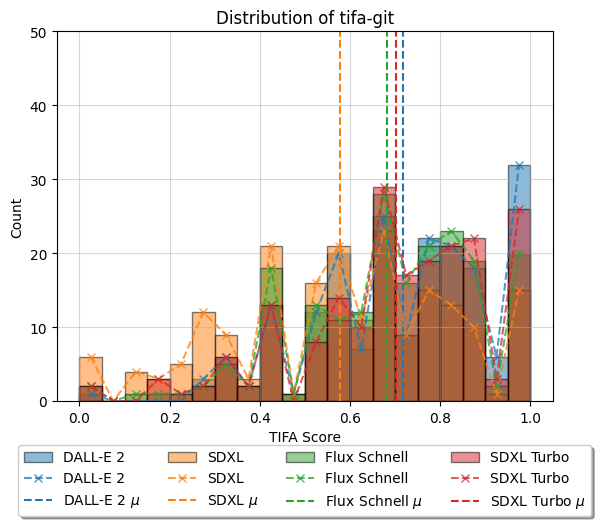

missing captions:  ['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
missing caption indices:  [30, 139]
DALL-E 2
mplug
[0.8333333333333334, 0.8, 0.6666666666666666, 0.6, 1, 0.6666666666666666, 0.6363636363636364, 0.6666666666666666, 0.6, 0.7142857142857143, 0.6666666666666666, 1, 0.8888888888888888, 0.75, 1, 0.5714285714285714, 0.7, 0.7142857142857143, 0.6666666666666666, 0.6666666666666666, 0.75, 0.75, 0.75, 0.8888888888888888, 0.7142857142857143, 0.7272727272727273, 0.6, 0.5, 1, 0.875, nan, 0.7777777777777778, 0.75, 0.6666666666666666, 1, 0.7777777777777778, 0.5714285714285714, 0.7, 0.8333333333333334, 1, 1, 1, 0.5, 0, 1, 0.8571428571428571, 0.8, 0.6666666666666666, 0.7777777777777778, 0.875, 0.8333333333333334, 0.6666666666666666, 0.75, 0.9, 0.875, 0.42857142857142855, 1, 0.8888888888888888, 0.8333333333333334, 0.6363636363636364, 0.875, 1, 0.75, 0.7272727272727273, 0.8, 0.727272727

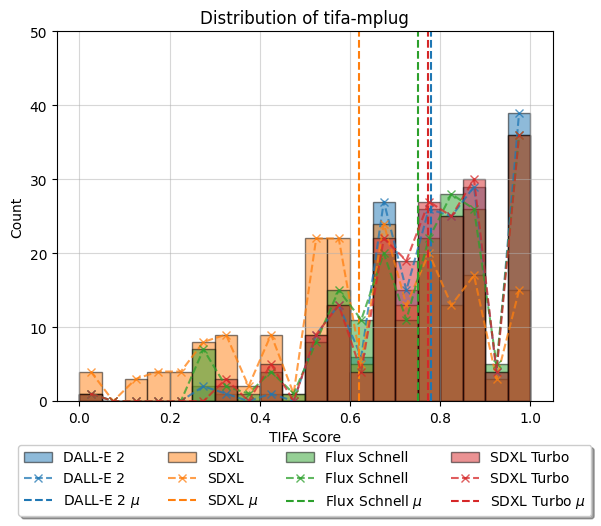

missing captions:  ['can of hairspray on light backdrop, studio lit stock photograph', 'A large waterfall spills over rocks into a river, daylight, national geographic']
missing caption indices:  [30, 139]
DALL-E 2
vilt
[0.6666666666666666, 0.4, 0, 0.2, 0.6666666666666666, 0.5, 0.6363636363636364, 0.5, 0.6, 0.7142857142857143, 0.6666666666666666, 0.7142857142857143, 0.4444444444444444, 0.5, 0.3333333333333333, 0.42857142857142855, 0.7, 0.5714285714285714, 0.5555555555555556, 0.6666666666666666, 0.625, 0.5, 0.5, 0.3333333333333333, 0.42857142857142855, 0.18181818181818182, 0.4, 0.5, 0.6666666666666666, 0.875, nan, 1, 0.625, 0.8333333333333334, 0.6666666666666666, 0.7777777777777778, 0.5714285714285714, 0.8, 0.5, 0.7777777777777778, 0.3333333333333333, 0.8571428571428571, 0.875, 0.3333333333333333, 1, 0.8571428571428571, 0.6, 1, 0.7777777777777778, 0.5, 0.6666666666666666, 0.5, 0.75, 0.8, 0.375, 0.42857142857142855, 0.75, 0.6666666666666666, 0.8333333333333334, 0.36363636363636365, 0.625

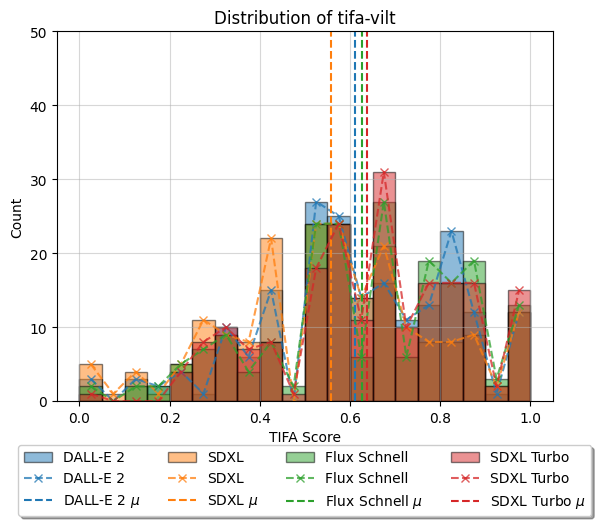

In [22]:
t2IModelList = ['DALL-E 2', 'SDXL', 'Flux Schnell', 'SDXL Turbo']
tifaMetricList = ['blip', 'git', 'mplug', 'vilt']

for metricIndex in range(len(tifaMetricList)):
    histogramPlot(t2IModelList,
                  tifaMetricList,
                  [dictOfDictTifaScoreDALLE, dictOfDictTifaScoreSDXL, dictOfDictTifaScoreFluxSchnell, dictOfDictTifaScoreSDXLTurbo],
                  metricIndex)

# Computation of the mean and the standard deviation of TIFAScore for the entire images prompt pairs

In [26]:
for i in range(4):
    print(listOfDictOfDictTifaScores[i].keys())

dict_keys(['tifaScore_DALL-E_512_blip-large.pkl', 'tifaScore_DALL-E_512_git-large.pkl', 'tifaScore_DALL-E_512_mplug-large.pkl', 'tifaScore_DALL-E_512_vilt.pkl'])
dict_keys(['tifaScore_SDXL_512_blip-large.pkl', 'tifaScore_SDXL_512_git-large.pkl', 'tifaScore_SDXL_512_mplug-large.pkl', 'tifaScore_SDXL_512_vilt.pkl'])
dict_keys(['tifaScore_FLUX_SCHNELL_512_blip-large.pkl', 'tifaScore_FLUX_SCHNELL_512_git-large.pkl', 'tifaScore_FLUX_SCHNELL_512_mplug-large.pkl', 'tifaScore_FLUX_SCHNELL_512_vilt.pkl'])
dict_keys(['tifaScore_SDXL_TURBO_512_blip-large.pkl', 'tifaScore_SDXL_TURBO_512_git-large.pkl', 'tifaScore_SDXL_TURBO_512_mplug-large.pkl', 'tifaScore_SDXL_TURBO_512_vilt.pkl'])


In [27]:
###### meanList = []
stdList = []

#print(tifaScoreListOfLists[0])
for i in range(len(listOfDictOfDictTifaScores)):
    for j in range(len(listOfDictOfDictTifaScores)):
        print(list(listOfDictOfDictTifaScores[i].keys())[j])
        tifaScoreList = [i['tifa_score'] for i in list(listOfDictOfDictTifaScores[i].values())[j]]
        #print(tifaScoreList)
        mean = np.mean(tifaScoreList)
        std = np.std(tifaScoreList)
        print(mean, std, (std/mean))
    print('-----')
    #meanList.append(np.mean(tifaScoreListOfLists[i]))
    #stdList.append(np.std(tifaScoreListOfLists[i]))
    #print(meanList[i], stdList[i])

tifaScore_DALL-E_512_blip-large.pkl
0.7955791683064409 0.1678989978572574 0.21103996251519008
tifaScore_DALL-E_512_git-large.pkl
0.7164835585290129 0.19989047079954647 0.2789882174127408
tifaScore_DALL-E_512_mplug-large.pkl
0.7797466002011455 0.16478891569395554 0.21133649784615433
tifaScore_DALL-E_512_vilt.pkl
0.6112304502456017 0.21487247455877817 0.35154085414501046
-----
tifaScore_SDXL_512_blip-large.pkl
0.6155818648242891 0.2326391035789105 0.3779174093202286
tifaScore_SDXL_512_git-large.pkl
0.5776746541898058 0.2431846005583182 0.42097156036625305
tifaScore_SDXL_512_mplug-large.pkl
0.6205321614412523 0.23305964494557527 0.37558028322701165
tifaScore_SDXL_512_vilt.pkl
0.5571219044703893 0.22794386541949638 0.4091454017342652
-----
tifaScore_FLUX_SCHNELL_512_blip-large.pkl
0.765194695876514 0.1694530504194666 0.22145089522002212
tifaScore_FLUX_SCHNELL_512_git-large.pkl
0.6831699024880843 0.20248344677236443 0.29638812546472815
tifaScore_FLUX_SCHNELL_512_mplug-large.pkl
0.7511245208

In [28]:
if is1024:
    !zip -r TIFAOutputPlots1024.zip /kaggle/working/

elif is1024 != True:
    !zip -r TIFAOutputPlots512.zip /kaggle/working/

  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/blip_line_plot_512.pdf (deflated 28%)
  adding: kaggle/working/mplug_histogram_plot_512.png (deflated 6%)
  adding: kaggle/working/vilt_scatter_plot_512.png (deflated 9%)
  adding: kaggle/working/git_scatter_plot_512.png (deflated 11%)
  adding: kaggle/working/blip_line_plot_512.png (deflated 3%)
  adding: kaggle/working/mplug_line_plot_512.png (deflated 2%)
  adding: kaggle/working/vilt_histogram_plot_512.png (deflated 5%)
  adding: kaggle/working/mplug_scatter_plot_512.pdf (deflated 31%)
  adding: kaggle/working/vilt_line_plot_512.png (deflated 2%)
  adding: kaggle/working/vilt_line_plot_512.pdf (deflated 28%)
  adding: kaggle/working/vilt_histogram_plot_512.pdf (deflated 36%)
  adding: kaggle/working/blip_histogram_plot_512.png (deflated 5%)
  adding: kaggle/working/git_line_plot_512.png (deflated 2%)
  adding: kaggle/working/git_scatter_plot_512.pdf (deflated 31%)
  adding: kaggle/working/blip_scatter_plot_512.pdf (defl